## Single Lane Traffic Simulation Class 

In [1]:
import numpy as np

In [2]:
class TrafficSimulation:
    def __init__(self, road_length = 100, density = 0.1, max_velocity = 5, p_slow = 0.5):
        """
        Create a traffic simulation object with cars of different velocity randomly 
        distributed along an one-lane road.
        
        Input:
        road_length (int): the number of cells on the road (default = 100) 
        density (float): the density of cars (default = 0.1)
        max_velocity (int): the maximum velocity of a car (default = 5)
        p_slow (float): the probability of a car randomly slowing down during update (default = 0.5)
        
        
        Other attributes:
        time_step: the number of time steps of the simulation (starts from 0)
        traffic_flow: the culmulative traffic flow at the boundary (starts from 0)
        state: the state of the simulation represented by one-dimensional array,
            -1 represents empty cells, integers from 0 to max_velocity represent the velocities of cars.        
        """
        
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.p_slow = p_slow
        self.time_step = 0
        self.traffic_flow = 0
    
        #set up initial state
        self.state = - np.ones((self.road_length,), dtype = np.int)
        index = np.random.choice(self.road_length, 
            size = int(self.density * self.road_length),
            replace = False)
        self.state[index] = np.random.choice(self.max_velocity +1, size = len(index))
     
    def update(self):
        """
        Update the cars' velocities and the state of the simulation after 1 time step.
        Keep track of time step and cumulative traffic flow. 
        """
        
        #Update cars' velocities
        for i in range(self.road_length) :
            if self.state[i] > -1:
                distance = 1 #empty cells between the car and the next car +1
                while self.state[(i+ distance) % self.road_length] == -1:
                    distance += 1
                #acceleration
                if self.state[i] < self.max_velocity and distance > self.state[i] +1:
                    self.state[i] +=1
                #slowing down
                if distance <= self.state[i]:
                    self.state[i] = distance -1
                #randomization
                if self.state[i] > 0 and np.random.random() < self.p_slow:
                    self.state[i] -= 1
                
        #Advance cars 1 time step   
        new_state = - np.ones((self.road_length,), dtype = np.int)
        for i in range(self.road_length):
            if self.state[i] != -1:
                new_state[(i + self.state[i]) % self.road_length] = self.state[i]
        self.state = new_state
          
        #update time step and traffic flow
        self.time_step +=1
        for i in range(5):
            if self.state[i] > i:
                self.traffic_flow +=1
                
    def display(self):
        """
        Display the state of the road. 
        "." represents empty cells, integers represents cars' velocities.
        """
        
        print(''.join('.' if x == -1 else str(x) for x in self.state))

#### Visualize the states over time at low and high densities

In [3]:
def run_simulation(sim, num_steps = int, display_step = False):
    """
    Run and display the traffic simulation for a certain number of time steps.
    """
    for step in range(num_steps):
        print("Time step", step) if display_step else 0
        sim.display()
        sim.update()

In [4]:
#Traffic flow at density 0.03
sim_lowDensity = TrafficSimulation(road_length =100, density = 0.03, max_velocity = 5, p_slow =0.5)
run_simulation(sim_lowDensity, num_steps = 30)

.....2...............................................................51.............................
........3............................................................0.1............................
............4.........................................................1..2..........................
................4......................................................1....3.......................
....................4...................................................1.......4...................
.........................5...............................................1..........4...............
..............................5............................................2............4...........
..................................4...........................................3.............4.......
.......................................5..........................................4.............4...
.5.........................................4..........................................4....

In [5]:
#Traffic flow at density 0.1
sim_highDensity = TrafficSimulation(road_length =100, density = 0.1, max_velocity = 5, p_slow =0.5)
run_simulation(sim_highDensity, num_steps = 30)

......................2........5..2..........3..4.......................5..0...1.....2........5.....
........................2.......1....3........1......5...................1.0.....2.....2...........5
....5.....................2.......2......4.....1.........4...............0..1......2.....2..........
.........5...................3.......3........5.1............4............1...2.......3.....3.......
..............5..................4.......4.....1..2...............5........1....2.........4....3....
..................4...................5......4..1...2.................4......2.....3..........4....4
...4...................5...................5..1..1.....3...................5...2......3..........3..
3......4...................4.................2.1..1.......3...................3...3.......4.........
...3........5...................5............0...2..2........3..................2....3.........5....
5.....3.........4....................5.......0.....2..2..........4................2.....3..

#### Analyze how traffic flow varies with density 

In [6]:
import matplotlib.pyplot as plt

In [7]:
"""
Run the Traffic Simulation for densities between 0.01 and 1 at an increment of 0.01,
each instance runs for 1000 time steps. At each density, run 10 simulations.
Keep track of the flow rate of each simulation and at different densities. 
"""
densities = [0.01 * i for i in range(1,100)]
flow = []
num_runs = 10

for density in densities:
    temp_flow=[]
    for i in range(num_runs):
        sim = TrafficSimulation(road_length =100, density = density, max_velocity = 5, p_slow =0.5)
        for step in range(1000):
            sim.update()
        temp_flow.append(sim.traffic_flow / sim.time_step)
    flow.append(temp_flow)

flow_means_single = []
flow_std_single = []

for i in range(len(flow)):
    mean = np.mean(flow[i])
    std = np.std(flow[i])
   
    flow_std_single.append(std)
    flow_means_single.append(mean)

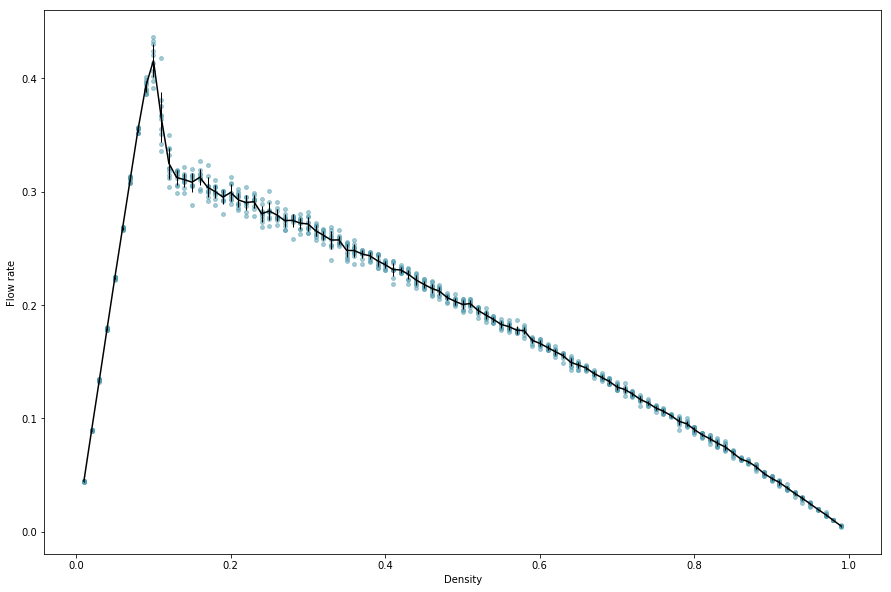

In [8]:
plt.figure(figsize=(15,10))
for index, density in enumerate(densities):
    plt.scatter([density for i in range(num_runs)],flow[index], color='#539caf', alpha = 0.5, s =15)
plt.errorbar(densities,flow_means_single,yerr = flow_std_single, fmt = '-', color = "k", alpha = 1,  elinewidth=1)

plt.xlabel('Density')
plt.ylabel('Flow rate')

plt.savefig('Single Lane Flow.png')
plt.show()

## Multi-lane Traffic Simulation Class

In [9]:
class TrafficSimulationMulti:
    def __init__(self, road_length = 100, density =0.5, max_velocity =5, p_slow =0.5, p_change = 0.5, n_lanes = 2):
        """
        Create a traffic simulation object with cars of different velocity randomly 
        distributed along a multiple-lane, uni-directional, road.
        
        Input:
        road_length (int): the number of cells on the road (default = 100)
        density (float): the density of cars (default = 0.1)
        max_velocity (int): the maximum velocity of a car (default = 5)
        p_slow (float): the probability of a car randomly slowing down during update (default = 0.5)
        p_change (float): the probability that a car will change lane (default =0.5). 
        n_lanes (int): the number of lanes in the model (default = 2). 

        Other attributes:
        time_step: the number of time steps of the simulation
        traffic_flow: the cumulative traffic flow at the boundary 
        n_lane_changes: the total of cars that change lane during the simulation
        state: the state of the simulation represented by two-dimensional array,
            -1 represents empty cells, integers from 0 to max_velocity represent the velocities of cars. 
        """  
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.p_slow = p_slow
        self.p_change = p_change
        self.n_lanes = n_lanes
          
        self.time_step = 0
        self.traffic_flow = 0
        self.n_lane_changes = 0
    
        #set up initial state
        self.state = []
        for lane in range(self.n_lanes):
            empty_lane = - np.ones((self.road_length,), dtype = np.int)
            self.state.append(empty_lane)
            index = np.random.choice(self.road_length, 
                size = int(self.density * self.road_length),
                replace = False)
            self.state[lane][index] = np.random.choice(self.max_velocity +1, size = len(index))
   
    def update(self):
        """
        Check for possible passing lane, change lane if condition are met. If there are
        multiple available lanes, change at the first lane checked. 
        Update the cars' velocities and the state of the simulation after 1 time step.
        Keep track of time step and cumulative traffic flow. 
        """
        new_state = [[-1] * self.road_length for i in range(self.n_lanes)]
        
        #checking for possible lane changes
        for current_lane in range(self.n_lanes):  
            if current_lane == 0:
                possible_passing_lanes = [1]
            elif current_lane == self.n_lanes - 1:
                possible_passing_lanes = [self.n_lanes - 2]
            else:
                possible_passing_lanes = [current_lane - 1, current_lane + 1]
        
            #check for gaps on current lane and possible_passing_lanes 
            for i in range(self.road_length):
                if self.state[current_lane][i] != -1:
                    
                    gap = 0 #empty cells between the car and the next car 
                    while self.state[current_lane][(i+1+ gap) % self.road_length] == -1:
                        gap += 1 #gap on current_lane
                        
                    change_lane = False #whether a car has made lane change
                    for other_lane in possible_passing_lanes:  
                        #check condition in each possible passing lane
                        gap_op = -1
                        while self.state[other_lane][(i+1+gap_op) %self.road_length] == -1:
                            gap_op +=1 #gap forward on the other lane

                        gap_op_back = -1
                        while self.state[other_lane][(i-1-gap_op_back) %self.road_length] == -1:
                            gap_op_back +=1 #gap backward on the other lane

                        #change lane if conditions are met
                        if (gap < self.state[current_lane][i] +1 and
                            gap_op > self.state[current_lane][i] +1 and
                            gap_op_back > self.max_velocity and
                            np.random.random() < self.p_change):
                        
                            new_state[other_lane][i] = self.state[current_lane][i]
                            self.n_lane_changes +=1
                            change_lane = True
                            break #break if change lane already
                            
                    #if no change is made, keep current lane
                    if not change_lane:
                        new_state[current_lane][i] = self.state[current_lane][i]
                        
        #parallel update the new cars' positions         
        self.state = new_state
             
        #Update velocities
        for lane in range(self.n_lanes):
            for i in range(self.road_length) :
                if self.state[lane][i] != -1:
                    gap = 0
                    while self.state[lane][(i+1+ gap) % self.road_length] == -1:
                        gap += 1

                    #acceleration
                    if self.state[lane][i] != self.max_velocity:
                        self.state[lane][i] +=1
                    #slowing down
                    if self.state[lane][i] > gap:
                        self.state[lane][i] = gap
                    #randomization
                    if self.state[lane][i] > 0 and np.random.random() < self.p_slow:
                        self.state[lane][i] -= 1

        #Advance cars 1 time step   
        new_state = [[-1] * self.road_length for i in range(self.n_lanes)]
        for lane in range(self.n_lanes):
            for i in range(self.road_length):
                if self.state[lane][i] != -1:
                    new_state[lane][(i + self.state[lane][i]) % self.road_length] = self.state[lane][i]
            self.state[lane] = new_state[lane]
          
        #update time step and traffic flow
        self.time_step +=1
        for lane in range(self.n_lanes):
            for i in range(5):
                if self.state[lane][i] > i:
                    self.traffic_flow +=1
    def display(self):
        for lane in range(self.n_lanes):
            print(''.join('.' if x == -1 else str(x) for x in self.state[lane]))        

### Two-lane Simulation
#### Visualize the states over time at low and high densities


In [10]:
#density =.03
sim_twolanes = TrafficSimulationMulti(road_length =100, density = 0.03, max_velocity = 5, p_slow =0.5, p_change =0.5, n_lanes =2)
run_simulation(sim_twolanes, num_steps = 20, display_step = True)

Time step 0
..............................................................................................0..52.
...................................................................5.....5....................3.....
Time step 1
2.......................................................................5.....................0..0..
.............................................................................4...................3..
Time step 2
...3.........................................................................5.................1..1.
3.................................................................................5.................
Time step 3
.......4..........................................................................5.............1..1
...3...................................................................................5............
Time step 4
1...........5.........................................................................4..........1..
.......4.......................

In [38]:
#density = 0.1
sim_twolanes = TrafficSimulationMulti(road_length =100, density = 0.1, max_velocity = 5, p_slow =0.5, p_change =0.5, n_lanes =2)
run_simulation(sim_twolanes, num_steps = 20, display_step = True)

Time step 0
.4.............232...........................1..0........................0.............55.5.........
.............................................................1..1.5.2.2.........0....3.2.....0....4.
Time step 1
......5.........0..2...........................20.....................2...1............0.1....4.....
...5.............2............................................1..1...3..2.......0....0...2...0......
Time step 2
..........4.....0....2...........................1......................2...2...........1..2.......5
........5..........2..............................3.............2.1...1...2......1....1.....30......
Time step 3
....5.........4..1.....2...........................2.......................3...3.........1....3.....
.............5........3..............................3...........1.1...1....2.....1....1....00......
Time step 4
.........5......2..2......3...........................3......................2....3........2......4.
.................4........4....

#### Analyze how traffic flow and total lane changes varies with density 

In [12]:
#keep track of both traffic flow and number of lane changes

densities = [0.01 * i for i in range(1,100)]
flow = []
change = [] #total lane change at each density
num_runs = 10
for density in densities:
    temp_flow=[]
    temp_change =[]
    for i in range(num_runs):
        sim = TrafficSimulationMulti(road_length =100, density = density, max_velocity = 5, p_slow =0.5, p_change =0.5, n_lanes =2)
        for c in range(1000):
            sim.update()
        temp_flow.append(sim.traffic_flow / sim.time_step)
        temp_change.append(sim.n_lane_changes)
    flow.append(temp_flow)
    change.append(temp_change)

#average flow and standard deviation at each density
flow_means_double = []
flow_std_double = []

for i in range(len(flow)):
    mean = np.mean(flow[i])
    std = np.std(flow[i])
   
    flow_std_double.append(std)
    flow_means_double.append(mean)

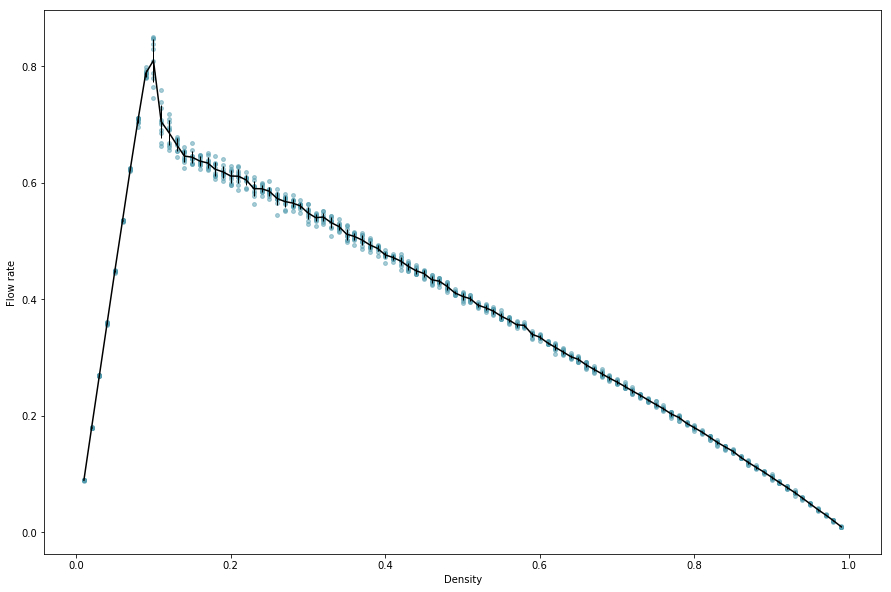

In [13]:
#traffic flow
plt.figure(figsize=(15,10))
for index, density in enumerate(densities):
    plt.scatter([density for i in range(num_runs)],flow[index], color='#539caf', alpha = 0.5, s =15)
plt.errorbar(densities,flow_means_double,yerr = flow_std_double, fmt = '-', color = "k", alpha = 1,  elinewidth=1)

plt.xlabel('Density')
plt.ylabel('Flow rate')

plt.savefig('Double Lane Flow.png')
plt.show()

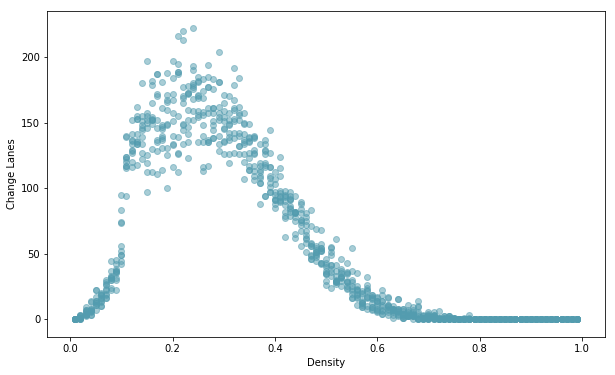

In [14]:
#lane changes
plt.figure(figsize=(10,6))
for index, density in enumerate(densities):
    plt.scatter([density for i in range(num_runs)],change[index], color = '#539caf',alpha = .50)

plt.xlabel('Density')
plt.ylabel('Change Lanes')

plt.savefig('Double Lane Changes.png')
plt.show()

### 3-lane Simulation

In [41]:
multi = TrafficSimulationMulti(road_length = 100, density = 0.1, max_velocity =5, p_slow =0.5, p_change = 0.5, n_lanes = 3)
run_simulation(multi, num_steps = 20, display_step = True)

Time step 0
......0..........1..2...1...........1..2.............2........2.5.4.................................
.......31....0..................................4..........2..0.....3........1.....4.........3......
...3..1.5....................................3....4......2............1.4.............5....2........
Time step 1
......0...........1....3..2..........1....3.............3.....0.0.....4.............................
.......0.1...0.......................................5.......2.1........4.....1........4.........4..
....1.0......5...................................4....4....2...........1.....5...........3...2......
Time step 2
.......1............2.......2..........2......4............3...10.........4.........................
.4......1..2.0.............4..............................5...1.1...........4..1...........4........
....0..1.........4..................................3....3...2...........2........5.........3..2....
Time step 3
........1..............3.......3..........3

#### Analyze how traffic flow and total lane changes varies with density 

In [18]:
densities = [0.01 * i for i in range(1,100)]
flow = []
change = []
num_runs = 10
for density in densities:
    temp_flow=[]
    temp_change =[]
    for i in range(num_runs):
        sim = TrafficSimulationMulti(road_length =100, density = density, max_velocity = 5, p_slow =0.5, p_change =0.5, n_lanes =3)
        for c in range(1000):
            sim.update()
        temp_flow.append(sim.traffic_flow / sim.time_step)
        temp_change.append(sim.n_lane_changes)
    flow.append(temp_flow)
    change.append(temp_change)

#average flow and standard deviation at each density
flow_means_triple = []
flow_std_triple = []

for i in range(len(flow)):
    mean = np.mean(flow[i])
    std = np.std(flow[i])
   
    flow_std_triple.append(std)
    flow_means_triple.append(mean)

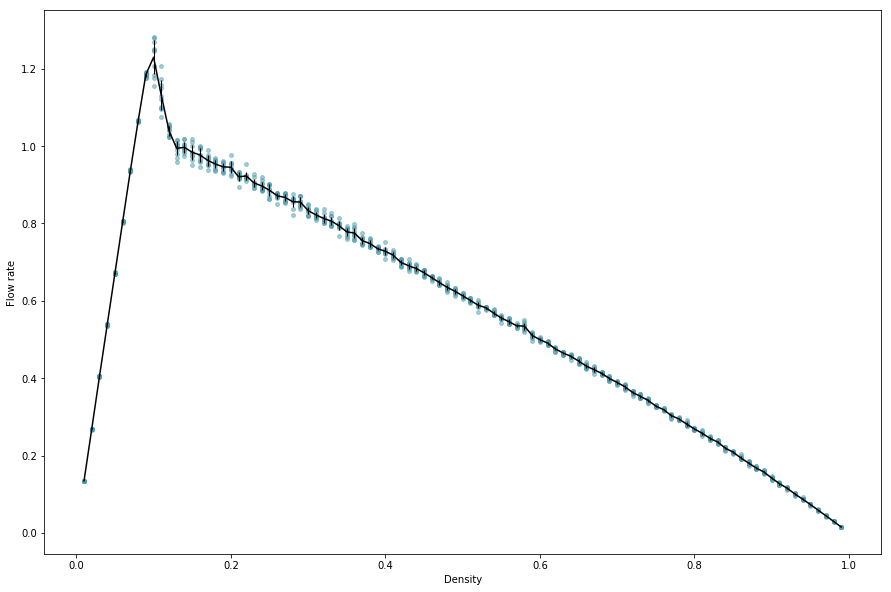

In [19]:
#traffic flow
plt.figure(figsize=(15,10))
for index, density in enumerate(densities):
    plt.scatter([density for i in range(num_runs)],flow[index], color='#539caf', alpha = 0.5, s =15)
plt.errorbar(densities,flow_means_triple,yerr = flow_std_triple, fmt = '-', color = "k", alpha = 1,  elinewidth=1)

plt.xlabel('Density')
plt.ylabel('Flow rate')

plt.savefig('Triple Lane Flow.png')
plt.show()

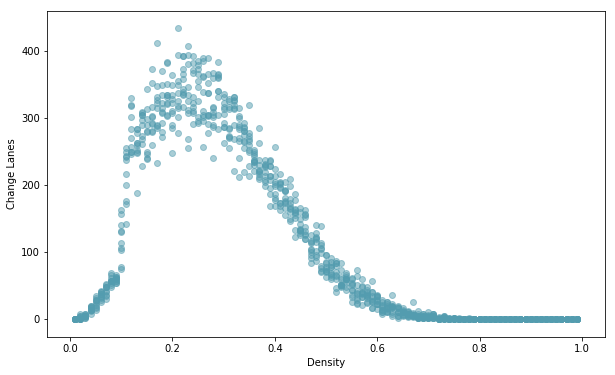

In [20]:
#lane changes
plt.figure(figsize=(10,6))
for index, density in enumerate(densities):
    plt.scatter([density for i in range(num_runs)],change[index], color = '#539caf',alpha = .50)

plt.xlabel('Density')
plt.ylabel('Change Lanes')

plt.savefig('Triple Lane Changes.png')
plt.show()

### Compare different models

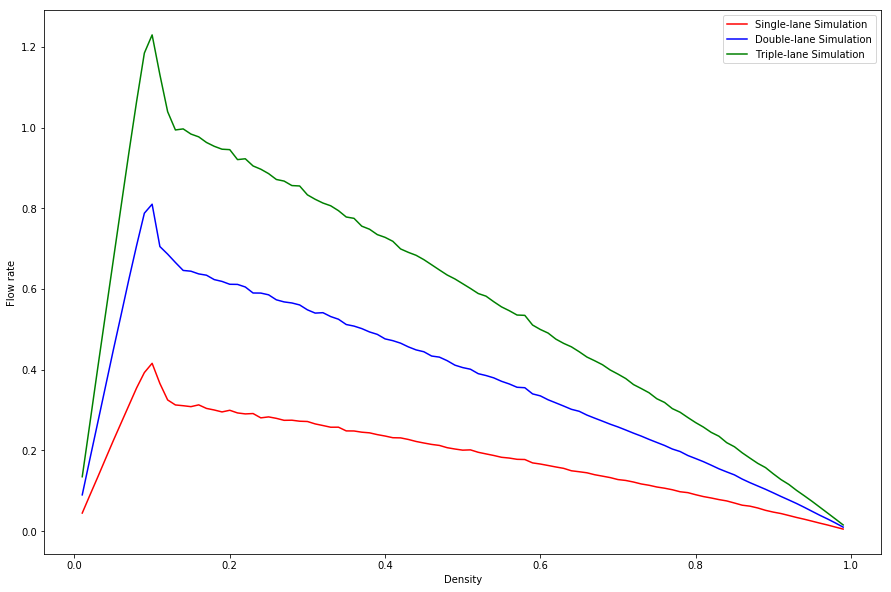

In [21]:
plt.figure(figsize=(15,10))

plt.plot(densities, flow_means_single, 'r', label = "Single-lane Simulation")
plt.plot(densities, flow_means_double, 'b', label = "Double-lane Simulation")
plt.plot(densities, flow_means_triple, 'g', label = "Triple-lane Simulation")

plt.xlabel('Density')
plt.ylabel('Flow rate')

plt.legend()

plt.savefig('Compare Models.png')
plt.show()